<a href="https://colab.research.google.com/github/simrran-sharma/MSC-IT-PART-1-SEM2/blob/main/BDA/PRACT10/pract10_Stock_Price_Prediction_Using_TIme_Series_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction using TIme Series Forcasting

This project aims to predict stock price of Microsoft stock using time series forcasting methods. We will import data, visualize the time series data and use following time series forcasting methods. 
- Simple moving average
- Simple exopnential smoothing
- Holt's linear method 
- Holt's winter method
- ARIMA 

In [ ]:
# import required libraries
import math
import numpy as np
import pandas as pd
from pandas import Series
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style("whitegrid")

import datetime as dt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Data Import
We are using data of Microsoft stock from 2011/01/01 to 2019/07/31

Data Source : Yahoo Finance

Link : https://in.finance.yahoo.com/quote/MSFT/history?p=MSFT

In [ ]:
# import data
stock_df = pd.read_csv('/content/MSFT.csv')

In [ ]:
stock_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,28.049999,28.18,27.920000,27.98,22.633337,53443800
1,2011-01-04,27.940001,28.17,27.850000,28.09,22.722317,54405600
2,2011-01-05,27.900000,28.01,27.770000,28.00,22.649515,58998700
3,2011-01-06,28.040001,28.85,27.860001,28.82,23.312819,88026300
4,2011-01-07,28.639999,28.74,28.250000,28.60,23.134863,73762000


### Data Description
- Open : Price of the stock at the beginning of the trading day 
- High : The highest price of the stock on that trading day
- Low : The lowest price of the stock on that trading day
- Close :  The price of the stock at closing time
- Volume :  Indicates how many stocks were traded
- Adjusted close : Price of the stock that adjusts the price for corporate actions

In [ ]:
df = stock_df[['Date','Adj Close']]

In [ ]:
df.head(5)

,Date,Adj Close
0,2011-01-03,22.633337
1,2011-01-04,22.722317
2,2011-01-05,22.649515
3,2011-01-06,23.312819
4,2011-01-07,23.134863


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head(5)

,Date,Adj Close
0,2011-01-03,22.633337
1,2011-01-04,22.722317
2,2011-01-05,22.649515
3,2011-01-06,23.312819
4,2011-01-07,23.134863


### Visualization of time series data

Text(0.5, 1.0, 'Microsoft stock price')

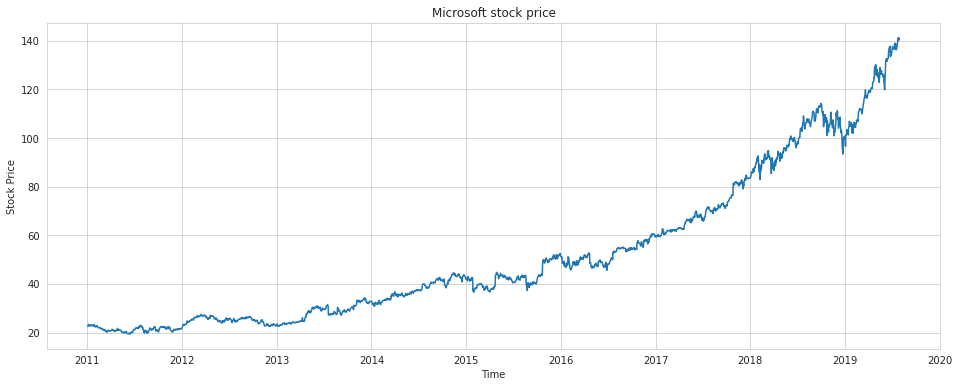

In [ ]:
# Time plot 
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Adj Close'])
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Microsoft stock price")

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%b')
df['Day'] = df['Date'].dt.day
df['Day_Of_Week'] = df['Date'].dt.strftime('%a')
df.head(5)

,Date,Adj Close,Year,Month,Day,Day_Of_Week
0,2011-01-03,22.633337,2011,Jan,3,Mon
1,2011-01-04,22.722317,2011,Jan,4,Tue
2,2011-01-05,22.649515,2011,Jan,5,Wed
3,2011-01-06,23.312819,2011,Jan,6,Thu
4,2011-01-07,23.134863,2011,Jan,7,Fri


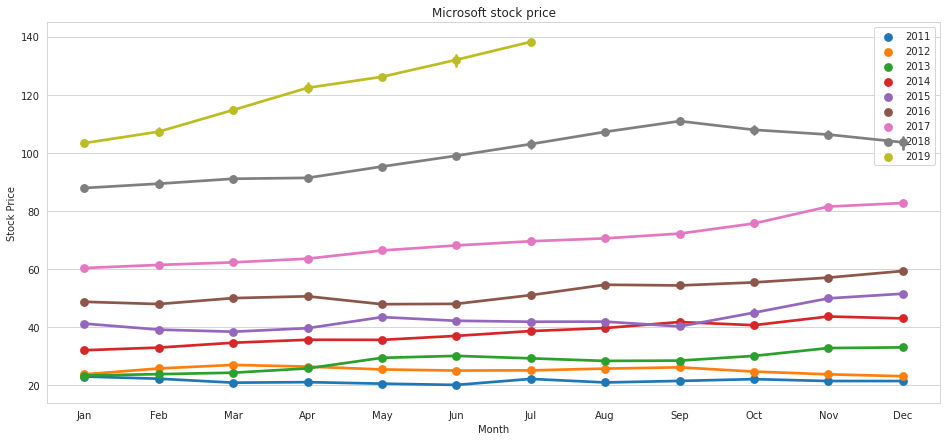

In [ ]:
# line charts
plt.figure(figsize=(16, 7))
sns.pointplot(x='Month', y='Adj Close', hue='Year', data=df, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Stock Price")
plt.title("Microsoft stock price")
plt.legend(loc='upper right')

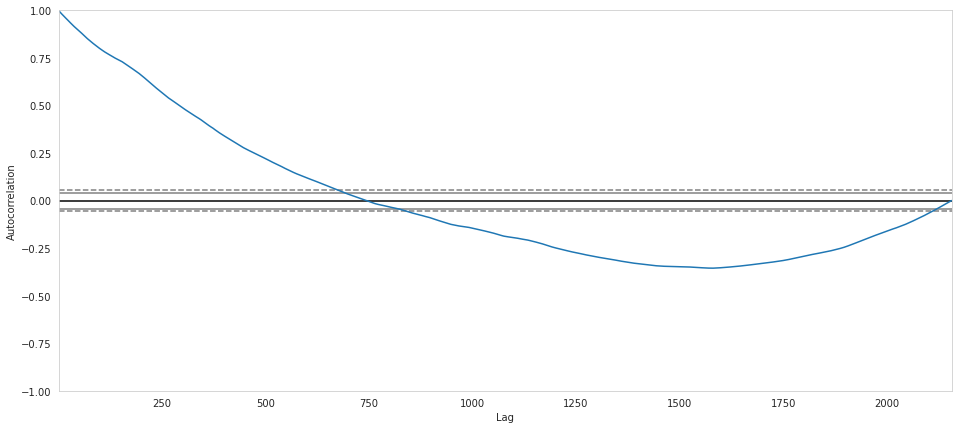

In [ ]:
# auto-correlation plot :show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.
plt.figure(figsize=(16,7))
autocorrelation_plot(df['Adj Close'])

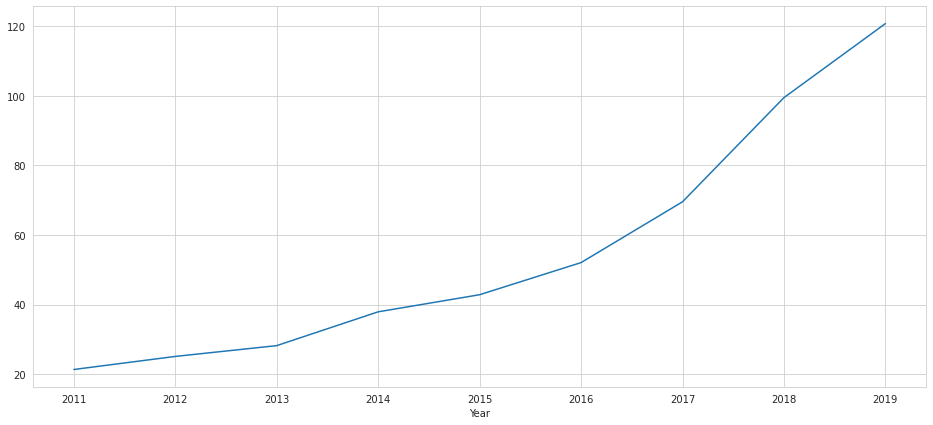

In [ ]:
plt.figure(figsize=(16,7))
df.groupby('Year')['Adj Close'].mean().plot()

### Model Building and Evaluation

In [ ]:
## train and test dataset
ts_df = stock_df[['Date','Adj Close']]
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
ts_df.index = ts_df['Date']
ts_df = ts_df[['Adj Close']]
print(ts_df.shape)
print(ts_df.head(5))

(2157, 1)
            Adj Close
Date                 
2011-01-03  22.633337
2011-01-04  22.722317
2011-01-05  22.649515
2011-01-06  23.312819
2011-01-07  23.134863


In [ ]:
#x_train = ts_df.loc['2011-01-03':'2017-12-31']
#x_test = ts_df.loc['2018-01-01' : '2019-07-30']
x_train = ts_df[ts_df.index < dt.datetime(2018,1,1,0,0,0)]
x_test = ts_df[ts_df.index >= dt.datetime(2018,1,1,0,0,0)]
print(x_train.shape, x_test.shape)

(1761, 1) (396, 1)


Text(0, 0.5, 'Stock Price')

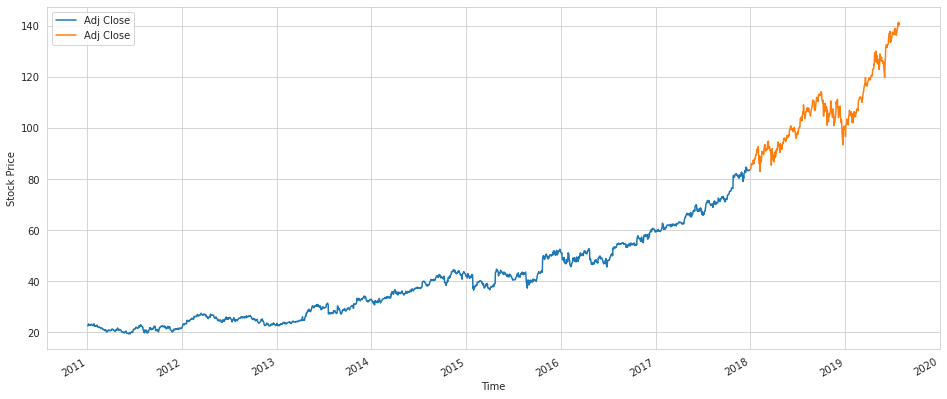

In [ ]:
ax = plt.gca()
x_train.plot(figsize=(16,7), label='Train', ax=ax)
x_test.plot(figsize=(16,7), label='Test', ax=ax)
plt.xlabel('Time')
plt.ylabel('Stock Price')

#### Simple Moving Averages Method

In [ ]:
y_hat_avg = x_test.copy()

In [ ]:
# rolling sum of 15 records
y_hat_avg['moving_avg'] = x_train['Adj Close'].rolling(15).mean().iloc[-1]
y_hat_avg.head(5)

,Adj Close,moving_avg
Date,,
2018-01-02,83.817863,83.409582
2018-01-03,84.207939,83.409582
2018-01-04,84.949089,83.409582
2018-01-05,86.002296,83.409582
2018-01-08,86.090065,83.409582


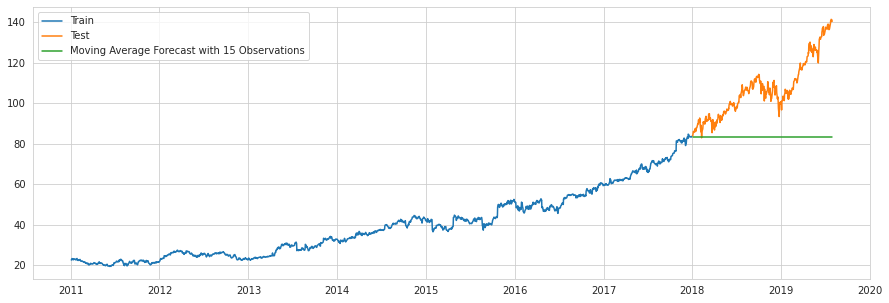

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(x_train['Adj Close'], label='Train')
plt.plot(x_test['Adj Close'], label='Test')
plt.plot(y_hat_avg['moving_avg'], label='Moving Average Forecast with 15 Observations')
plt.legend(loc='best')
plt.show()

In [ ]:
np.sqrt(mean_squared_error(y_hat_avg['moving_avg'], x_test['Adj Close']))

27.72740612036752

#### Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt 

In [ ]:
y_hat_ses = x_test.copy()
mod = SimpleExpSmoothing(np.asarray(x_train['Adj Close'])).fit(smoothing_level=0.8,optimized=False)
y_hat_ses['SES'] = mod.forecast(len(x_test))

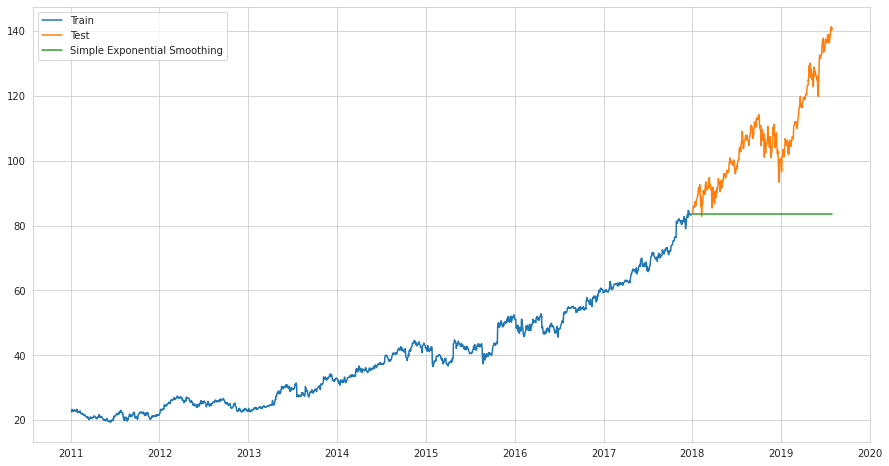

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(x_train['Adj Close'], label='Train')
plt.plot(x_test['Adj Close'], label='Test')
plt.plot(y_hat_ses['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')
plt.show()

In [ ]:
np.sqrt(mean_squared_error(y_hat_ses['SES'], x_test['Adj Close']))

27.69226716320278

#### Holt's Linear Model

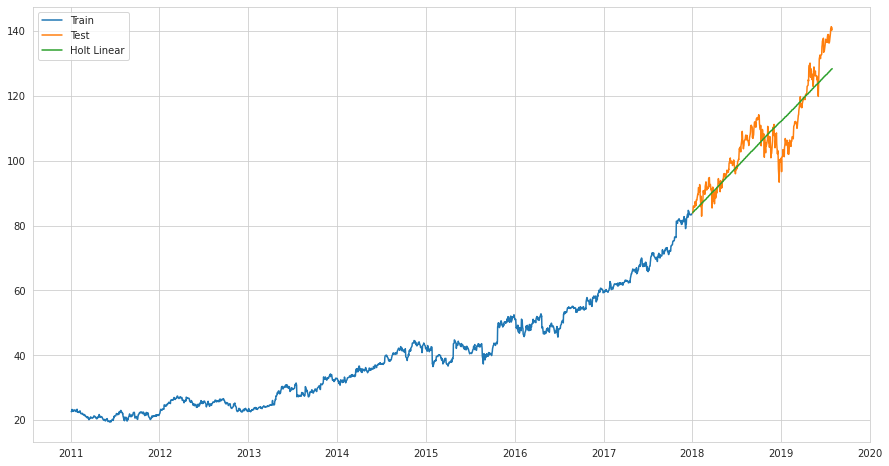

In [ ]:
y_hat_holt = x_test.copy()
fit = Holt(np.asarray(x_train['Adj Close'])).fit(smoothing_level = 0.25, smoothing_slope = 0.05)
y_hat_holt['Holt_linear'] = fit.forecast(len(x_test))
plt.figure(figsize = (15,8))
plt.plot(x_train['Adj Close'], label = 'Train')
plt.plot(x_test['Adj Close'], label = 'Test')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [ ]:
np.sqrt(mean_squared_error(x_test['Adj Close'], y_hat_holt['Holt_linear']))

5.892139444750359

#### Holt's Winter Method

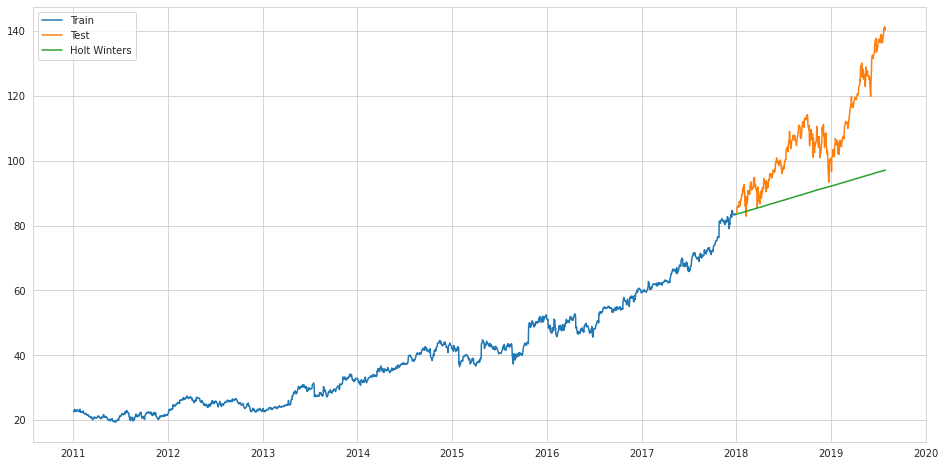

In [ ]:
y_hat_win = x_test.copy()
fit = ExponentialSmoothing(np.asarray(x_train['Adj Close']), seasonal_periods= 6, trend = 'add', seasonal= 'add').fit()
y_hat_win['Holt_Winter'] = fit.forecast(len(x_test))
plt.figure(figsize = (16,8))
plt.plot(x_train['Adj Close'], label = 'Train')
plt.plot(x_test['Adj Close'], label = 'Test')
plt.plot(y_hat_win['Holt_Winter'], label = 'Holt Winters')
plt.legend(loc = 'best')

In [ ]:
np.sqrt(mean_squared_error(x_test['Adj Close'], y_hat_win['Holt_Winter']))

20.016413461202433

#### ARIMA

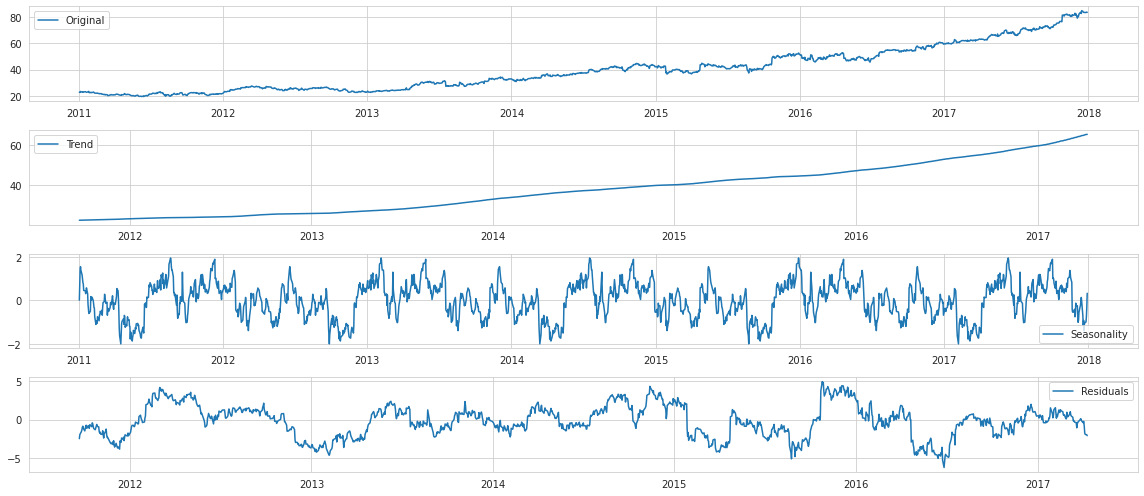

In [ ]:
## decompose time series data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x_train, freq=365)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(x_train["Adj Close"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Test Statistic                    2.084111
p-value                           0.998773
#Lags Used                       11.000000
Number of Observations Used    1749.000000
Critical Value (1%)              -3.434094
Critical Value (5%)              -2.863194
Critical Value (10%)             -2.567651
dtype: float64


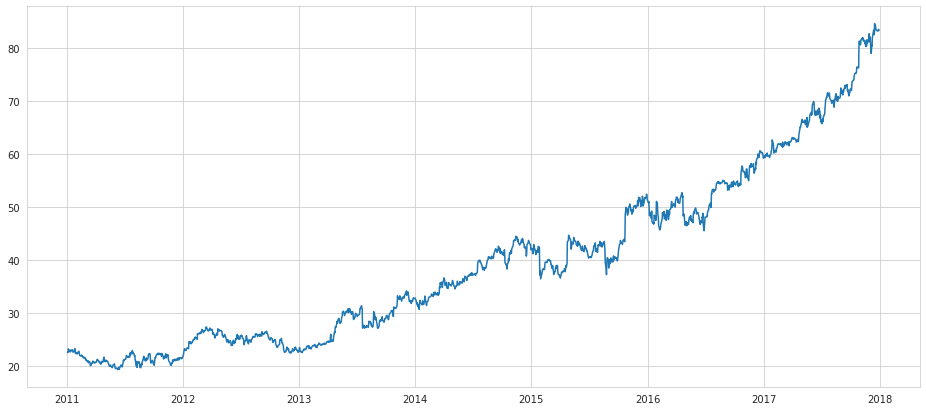

In [ ]:
# Augmented Dickey-Fuller (ADF) test for stationary data
from statsmodels.tsa.stattools import adfuller

def stationary_data_test(data):
    df_test = adfuller(data['Adj Close'], autolag='AIC')
    df_op = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key, value in df_test[4].items():
        df_op['Critical Value (%s)'%key] = value
    
    print(df_op)
    plt.figure(figsize=(16,7))
    plt.plot(data.index, data['Adj Close'])
    plt.show()
    
stationary_data_test(x_train)

In [ ]:
log_test = x_test
log_test = log_test["Adj Close"].apply(lambda x: math.log(x+1))
log_test = pd.DataFrame(log_test)

Test Statistic                    0.253670
p-value                           0.975116
#Lags Used                        0.000000
Number of Observations Used    1760.000000
Critical Value (1%)              -3.434071
Critical Value (5%)              -2.863184
Critical Value (10%)             -2.567645
dtype: float64


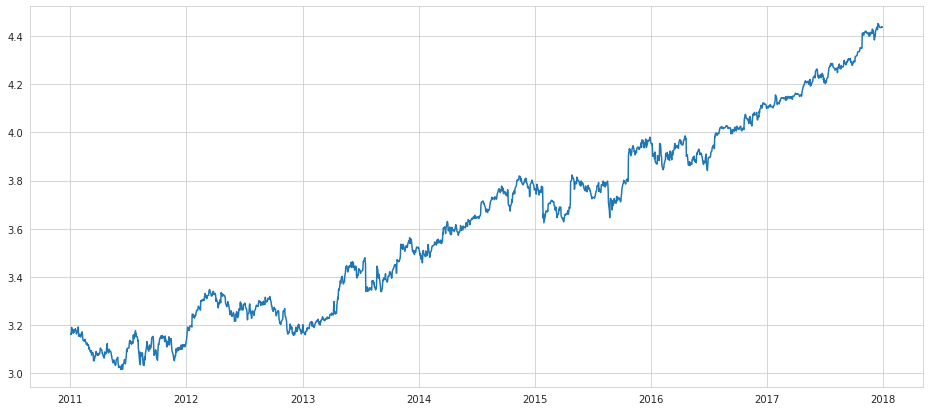

In [ ]:
## Now take the log (To make variance constant) and check for stationary again 
log_train = x_train
log_train = log_train["Adj Close"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationary_data_test(log_train)

In [ ]:
test_diff = log_test["Adj Close"] - log_test["Adj Close"].shift(12)
test_diff = test_diff.fillna(0)
test_diff = pd.DataFrame(test_diff)

Test Statistic                -6.642373e+00
p-value                        5.369744e-09
#Lags Used                     2.400000e+01
Number of Observations Used    1.736000e+03
Critical Value (1%)           -3.434122e+00
Critical Value (5%)           -2.863206e+00
Critical Value (10%)          -2.567657e+00
dtype: float64


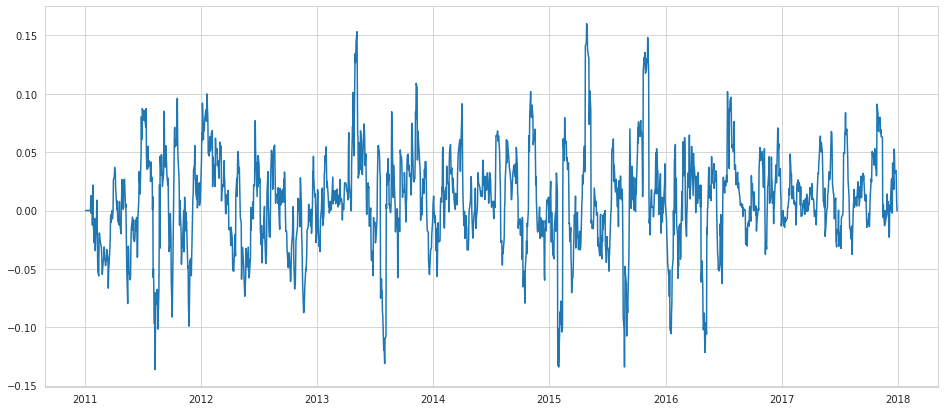

In [ ]:
first_diff = log_train["Adj Close"] - log_train["Adj Close"].shift(12)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationary_data_test(first_diff)

Test Statistic                -6.642373e+00
p-value                        5.369744e-09
#Lags Used                     2.400000e+01
Number of Observations Used    1.736000e+03
Critical Value (1%)           -3.434122e+00
Critical Value (5%)           -2.863206e+00
Critical Value (10%)          -2.567657e+00
dtype: float64


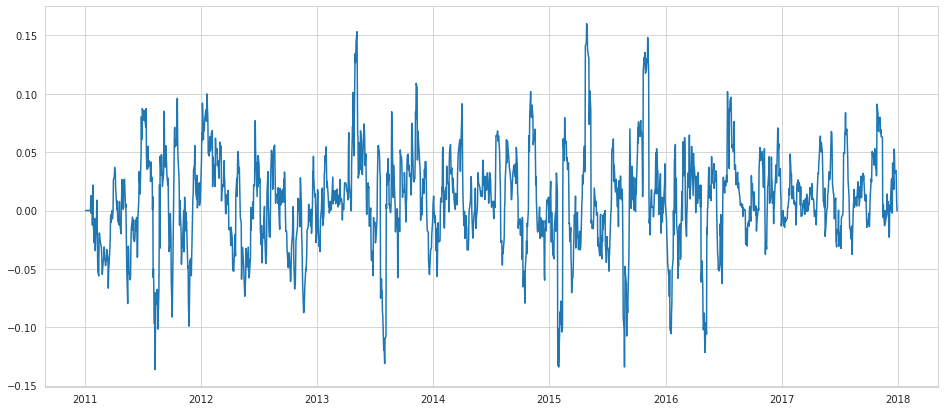

In [ ]:
seasonal_data_differenced = log_train["Adj Close"] - log_train["Adj Close"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationary_data_test(seasonal_data_differenced)

In [ ]:
seasonal_data_differenced.head(5)

,Adj Close
Date,
2011-01-03,0.0
2011-01-04,0.0
2011-01-05,0.0
2011-01-06,0.0
2011-01-07,0.0


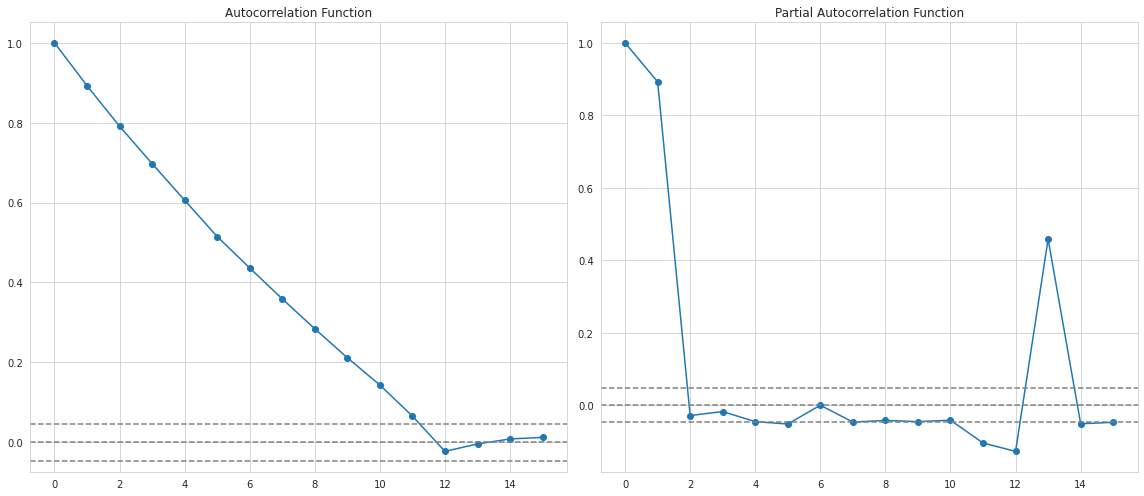

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=15)
lag_pacf = pacf(first_diff, nlags=15, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 2, 1))  
results_AR = model.fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


12.619156831951072


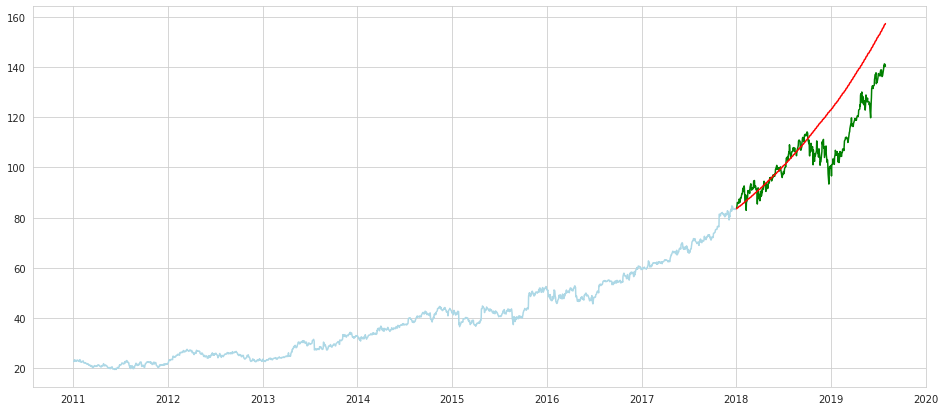

In [ ]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

#print(results_AR.summary())

### Conclusion

From all the above model, holts linear model performed best. It has RMSE of 5.89. We can implement Seasonal ARIMA also for better results.

### References
1] https://www.youtube.com/watch?v=d4Sn6ny_5LI&feature=youtu.be

2] https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

3] https://github.com/MayureshShilotri/26-Weeks-Of-Data-Science/blob/master/Week-19-Timeseries_1/notebooks/T-series-1.ipynb